In [31]:
#!pip install yellowbrick
#!pip install ds_utils
#!pip install data-science-utils
#!pip install Cmake
#!pip install pacmap
#!pip install ipywidgets

In [9]:
#!pip install -U pip wheel setuptools

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

### Load dataset 

In [2]:
df = pd.read_csv('data/Data_Analysis.csv')
df = df[['Player', 'Team', 'FG%', '3P%', 'FT%', 'TS%', 'eFG%', 'ORB%', 'DRB%',
       'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg', 'DRtg',
       'eDiff', 'PTS_p40', 'FGM_p40', 'FGA_p40', '3PM_p40',
       '3PA_p40', 'FTM_p40', 'FTA_p40', 'ORB_p40', 'DRB_p40', 'REB_p40',
       'AST_p40', 'STL_p40', 'BLK_p40', 'TOV_p40', 'PF_p40', 'AST/TO']]
df.head()

,Player,Team,FG%,3P%,FT%,TS%,eFG%,ORB%,DRB%,AST%,...,FTA_p40,ORB_p40,DRB_p40,REB_p40,AST_p40,STL_p40,BLK_p40,TOV_p40,PF_p40,AST/TO
0,Alberto Abalde,RMB,0.407,0.358,0.750,0.518,0.487,4.4,15.9,13.6,...,2.380952,1.339286,4.985119,6.324405,3.273810,1.041667,0.000000,2.380952,3.869048,1.375000
1,James Anderson,EFE,0.524,0.476,0.909,0.634,0.603,8.5,18.5,5.8,...,1.224603,2.449207,5.789034,8.238241,1.447259,1.335931,0.222655,1.001948,3.673810,1.444444
2,Danilo Andjusic,ASM,0.420,0.425,0.873,0.600,0.525,2.1,8.9,8.7,...,5.808959,0.654531,2.618122,3.272653,2.127224,0.654531,0.081816,2.945388,4.254449,0.722222
3,Kostas Antetokounmpo,LYV,0.692,0.400,0.548,0.690,0.703,9.2,18.0,4.5,...,4.916594,2.692420,5.384841,8.077261,0.936494,1.638865,2.224173,2.458297,6.789582,0.380952
4,Dwayne Bacon,ASM,0.445,0.419,0.803,0.547,0.510,2.8,13.8,8.0,...,4.139997,0.817105,4.085524,4.902628,1.797630,1.579736,0.000000,1.852104,3.922103,0.970588


### Preparazione (Normalizzazione) dataset per analisi k-means & PCA

In [3]:
# selecting only numerical metrics

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

stats = df.select_dtypes(include=numerics)
stats=stats.fillna(0)

In [4]:
stats

,FG%,3P%,FT%,TS%,eFG%,ORB%,DRB%,AST%,TOV%,STL%,...,FTA_p40,ORB_p40,DRB_p40,REB_p40,AST_p40,STL_p40,BLK_p40,TOV_p40,PF_p40,AST/TO
0,0.407,0.358,0.750,0.518,0.487,4.4,15.9,13.6,16.3,1.5,...,2.380952,1.339286,4.985119,6.324405,3.273810,1.041667,0.000000,2.380952,3.869048,1.375000
1,0.524,0.476,0.909,0.634,0.603,8.5,18.5,5.8,11.7,1.9,...,1.224603,2.449207,5.789034,8.238241,1.447259,1.335931,0.222655,1.001948,3.673810,1.444444
2,0.420,0.425,0.873,0.600,0.525,2.1,8.9,8.7,15.7,0.9,...,5.808959,0.654531,2.618122,3.272653,2.127224,0.654531,0.081816,2.945388,4.254449,0.722222
3,0.692,0.400,0.548,0.690,0.703,9.2,18.0,4.5,16.1,2.3,...,4.916594,2.692420,5.384841,8.077261,0.936494,1.638865,2.224173,2.458297,6.789582,0.380952
4,0.445,0.419,0.803,0.547,0.510,2.8,13.8,8.0,8.4,2.3,...,4.139997,0.817105,4.085524,4.902628,1.797630,1.579736,0.000000,1.852104,3.922103,0.970588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.500,0.359,0.625,0.559,0.549,2.6,13.0,31.8,13.7,1.9,...,2.174800,0.761180,3.588419,4.349599,6.089439,1.250510,0.217480,2.609759,3.751529,2.333333
203,0.505,0.408,0.815,0.616,0.586,6.0,16.2,10.4,13.9,2.1,...,2.782832,1.840950,5.051911,6.892861,2.311891,1.455635,0.342502,2.269078,2.226266,1.018868
204,0.667,0.000,0.730,0.690,0.667,13.3,18.7,6.0,11.1,1.3,...,5.429312,4.087235,5.429312,9.516547,1.159067,0.915053,1.586091,2.074119,2.806161,0.558824
205,0.443,0.444,0.694,0.578,0.551,4.9,14.1,10.0,16.8,2.1,...,2.990540,1.525786,4.211169,5.736955,2.258163,1.464754,0.183094,2.319194,3.600854,0.973684


In [5]:
scaler = StandardScaler()
X_std  = scaler.fit_transform(stats)
X_std = pd.DataFrame(X_std,columns=stats.columns)
X_std

,FG%,3P%,FT%,TS%,eFG%,ORB%,DRB%,AST%,TOV%,STL%,...,FTA_p40,ORB_p40,DRB_p40,REB_p40,AST_p40,STL_p40,BLK_p40,TOV_p40,PF_p40,AST/TO
0,-0.589415,0.235142,-0.120928,-0.628269,-0.582978,-0.308665,0.363017,-0.054523,0.363668,-0.439454,...,-0.405481,-0.286561,0.523368,0.173640,0.069137,-0.415447,-0.784926,0.114621,-0.134564,-0.031573
1,0.701159,1.083652,1.004033,0.966108,0.936283,0.649505,0.865268,-0.883456,-0.611782,0.114379,...,-1.181858,0.575939,1.038888,0.916432,-0.822181,0.170813,-0.408176,-1.369543,-0.278294,0.069784
2,-0.446018,0.716923,0.749325,0.498790,-0.085289,-0.846175,-0.989197,-0.575263,0.236436,-1.270204,...,1.896096,-0.818672,-0.994494,-1.010797,-0.490372,-1.186736,-0.646487,0.722098,0.149163,-0.984329
3,2.554292,0.537154,-1.550124,1.735807,2.245991,0.813095,0.768681,-1.021611,0.321257,0.668211,...,1.296958,0.764936,0.779694,0.853953,-1.071423,0.774345,2.978558,0.197863,2.015487,-1.482427
4,-0.170254,0.673779,0.254059,-0.229675,-0.281745,-0.682585,-0.042647,-0.649654,-1.311562,0.668211,...,0.775549,-0.692338,-0.053507,-0.378176,-0.651207,0.656544,-0.784926,-0.454556,-0.095505,-0.621829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.436426,0.242332,-1.005331,-0.064739,0.229041,-0.729325,-0.197186,1.879654,-0.187673,0.114379,...,-0.543893,-0.735797,-0.372280,-0.592816,1.443103,0.000629,-0.416932,0.360876,-0.221079,1.367155
203,0.491579,0.594680,0.338961,0.718704,0.713633,0.065255,0.420969,-0.394598,-0.145262,0.391295,...,-0.135657,0.103274,0.566199,0.394267,-0.400259,0.409299,-0.205384,-0.005784,-1.343953,-0.551363
204,2.278528,-2.339154,-0.262433,1.735807,1.774496,1.771265,0.903902,-0.862201,-0.739015,-0.716371,...,1.641200,1.848821,0.808212,1.412565,-0.962812,-0.667700,1.898871,-0.215611,-0.917043,-1.222816
205,-0.192315,0.853548,-0.517141,0.196409,0.255235,-0.191815,0.015305,-0.437107,0.469696,0.391295,...,0.003799,-0.141635,0.027065,-0.054360,-0.426477,0.427467,-0.475116,0.048153,-0.332003,-0.617310


## Prima di proseguire elimina le variabili che ritieni non utili

In [6]:
# Let's define max. 6 different cluster colors - if you like you can add here more.
cluster_colors = [ '#ddb247', '#d15252', '#1d4a60', '#cd7e59', '#ddb247', '#d15252','#b4d2b1']

## Dopo aver standardizzato i valori utilizzo 3 tecniche per aiutarmi a decidere quale sia la suddivisione ottimale dei cluster.

- Elbow method
- silhouette_score
- Silhouette plots

Cerca teoria per tesi

### YellowBrick  Tecnica del Gomito

C:\Users\ecca1\anaconda3\envs\Football\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\ecca1\anaconda3\envs\Football\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


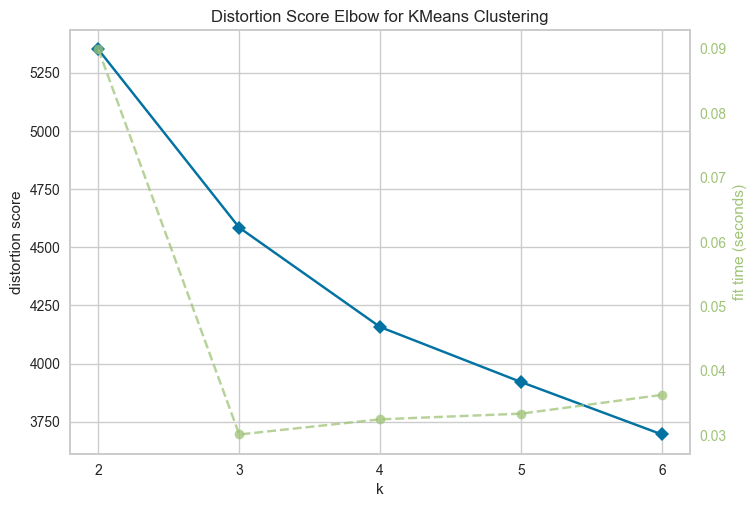

In [7]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(), k=(2,7),ax=ax)
visualizer.fit(X_std)

ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

C:\Users\ecca1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\ecca1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\ecca1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\ecca1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\ecca1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. 

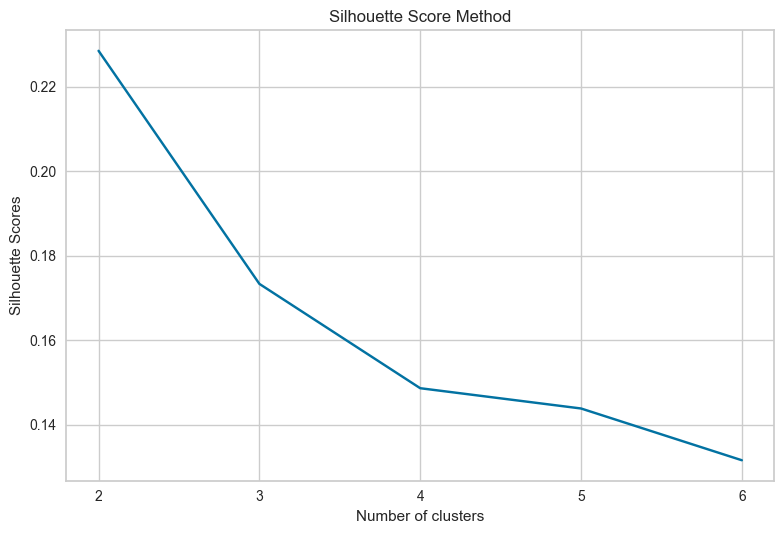

In [8]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')
    km.fit(X_std)
    silhouette_scores.append(silhouette_score(X_std, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

### Silhouette plots

C:\Users\ecca1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\ecca1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\ecca1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\ecca1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\ecca1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. 

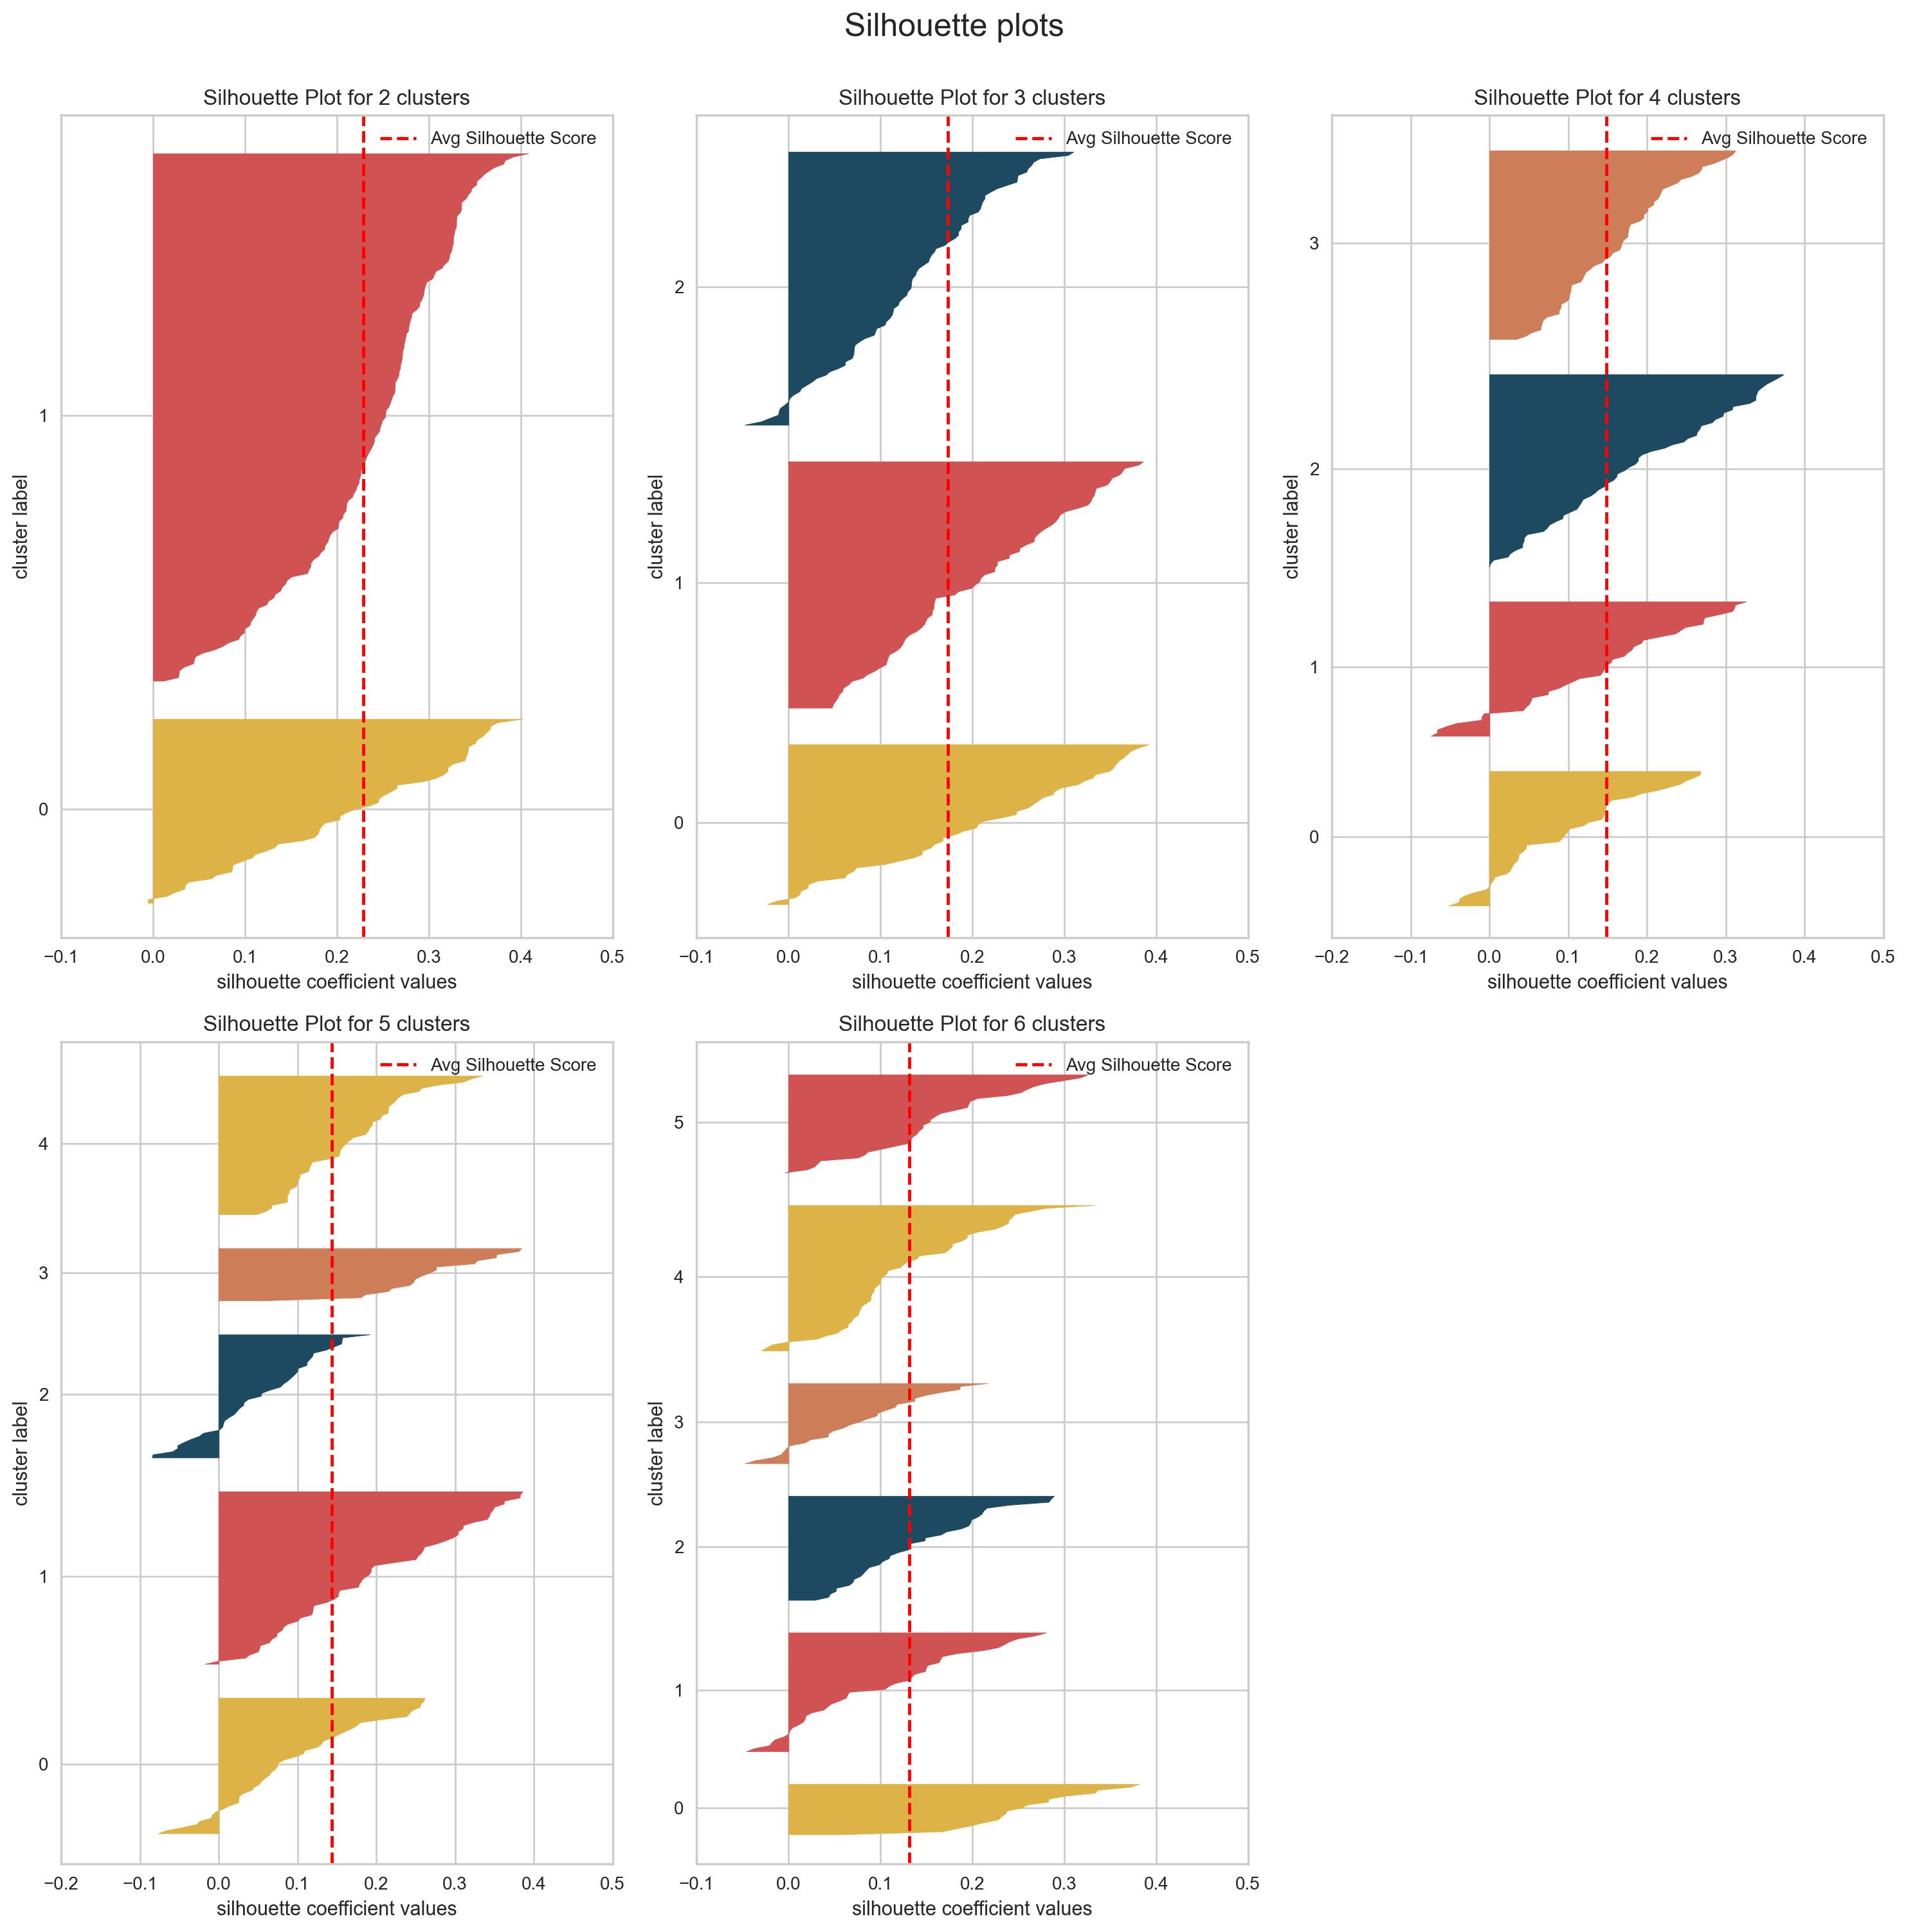

In [9]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.ticker as ticker

def silhouette_plot(X, model, ax, colors):
    y_lower = 10
    y_tick_pos_ = []
    sh_samples = silhouette_samples(X, model.labels_)
    sh_score = silhouette_score(X, model.labels_)
    
    for idx in range(model.n_clusters):
        values = sh_samples[model.labels_ == idx]
        values.sort()
        size = values.shape[0]
        y_upper = y_lower + size
        ax.fill_betweenx(np.arange(y_lower, y_upper),0,values,
                         facecolor=colors[idx],edgecolor=colors[idx]
        )
        y_tick_pos_.append(y_lower + 0.5 * size)
        y_lower = y_upper + 10

    ax.axvline(x=sh_score, color="red", linestyle="--", label="Avg Silhouette Score")
    ax.set_title("Silhouette Plot for {} clusters".format(model.n_clusters))
    l_xlim = max(-1, min(-0.1, round(min(sh_samples) - 0.1, 1)))
    u_xlim = min(1, round(max(sh_samples) + 0.1, 1))
    ax.set_xlim([l_xlim, u_xlim])
    ax.set_ylim([0, X.shape[0] + (model.n_clusters + 1) * 10])
    ax.set_xlabel("silhouette coefficient values")
    ax.set_ylabel("cluster label")
    ax.set_yticks(y_tick_pos_)
    ax.set_yticklabels(str(idx) for idx in range(model.n_clusters))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.legend(loc="best")
    return ax


# Plot for multiple ks
k_max = 6
ncols = 3
# calculate number of rows
nrows = k_max // ncols + (k_max % ncols > 0)
# set figure size
fig = plt.figure(figsize=(15,15), dpi=200)

for k in range(2,k_max+1):
    
    # Apply clustering for k clusters
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')

    km_fit = km.fit(X_std)
    
    # create chart
    ax = plt.subplot(nrows, ncols, k-1)
    silhouette_plot(X_std, km_fit,ax, cluster_colors)

fig.suptitle("Silhouette plots", fontsize=18, y=1)
plt.tight_layout()
plt.show()

### Come si puo' notare le tecniche mi suggeriscono una suddivisione di 4 o 5 cluster, ma essendo il tuo scopo quello di ricercare lo stile di gioco e ed essendo il dataset composto da soli 200 giocatori la soluzione migliore in questo caso consiste nel suddividere in cluster piu' grandi il nostro dataset e suddividere successivamente questi in altri piu' piccoli in modo da rilevare al loro interno dei pattern che ne identificano lo stile di gioco.  
##### Se avessimo proseguito ora con il selezionare 5 come numero di cluster avremo ottenuto al loro interno un numero di giocatori troppo basso per poterlo suddevidere ulteriormente.

***
***
### K_Means Implementazione

#### Seleziono 3 come num ottimale suddivisione

In [10]:
# Final decision
km = KMeans(n_clusters=3, 
            max_iter=300, 
            tol=1e-04, 
            init='k-means++', 
            n_init=10, 
            random_state=42, 
            algorithm='auto')

km_fit = km.fit(X_std)

C:\Users\ecca1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


### cardinality & magnitude

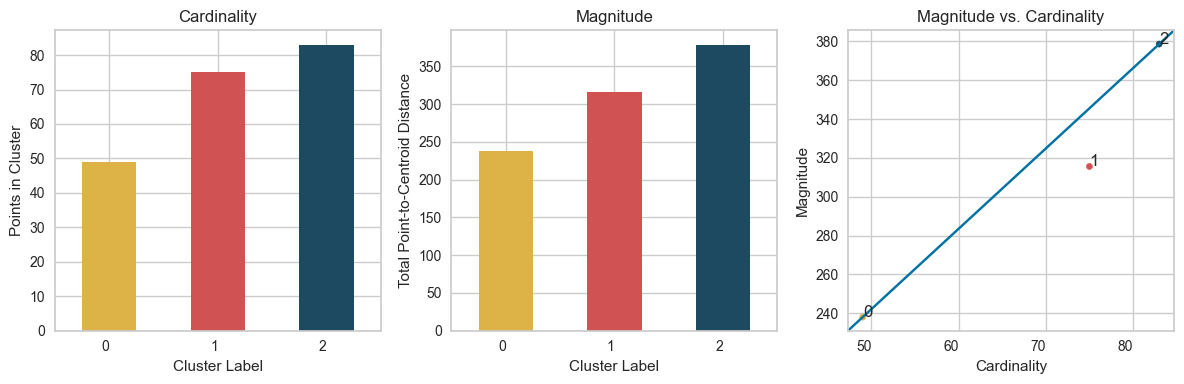

In [11]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(km_fit.labels_,
                         ax=ax1,
                         title="Cardinality",
                         color=cluster_colors
                        )
plot_cluster_magnitude(X_std,
                       km_fit.labels_,
                       km_fit.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )
plot_magnitude_vs_cardinality(X_std,
                              km_fit.labels_,
                              km_fit.cluster_centers_,
                              euclidean,
                              color=cluster_colors[0:km_fit.n_clusters],
                              ax=ax3, 
                              title="Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

https://developers.google.com/machine-learning/clustering/interpret

Qua trovi interpretazione della cluster cardinality and magnitude.


In [12]:
df['cluster'] = km.labels_
X_std['cluster'] = km.labels_

In [13]:
df

,Player,Team,FG%,3P%,FT%,TS%,eFG%,ORB%,DRB%,AST%,...,ORB_p40,DRB_p40,REB_p40,AST_p40,STL_p40,BLK_p40,TOV_p40,PF_p40,AST/TO,cluster
0,Alberto Abalde,RMB,0.407,0.358,0.750,0.518,0.487,4.4,15.9,13.6,...,1.339286,4.985119,6.324405,3.273810,1.041667,0.000000,2.380952,3.869048,1.375000,2
1,James Anderson,EFE,0.524,0.476,0.909,0.634,0.603,8.5,18.5,5.8,...,2.449207,5.789034,8.238241,1.447259,1.335931,0.222655,1.001948,3.673810,1.444444,2
2,Danilo Andjusic,ASM,0.420,0.425,0.873,0.600,0.525,2.1,8.9,8.7,...,0.654531,2.618122,3.272653,2.127224,0.654531,0.081816,2.945388,4.254449,0.722222,1
3,Kostas Antetokounmpo,LYV,0.692,0.400,0.548,0.690,0.703,9.2,18.0,4.5,...,2.692420,5.384841,8.077261,0.936494,1.638865,2.224173,2.458297,6.789582,0.380952,0
4,Dwayne Bacon,ASM,0.445,0.419,0.803,0.547,0.510,2.8,13.8,8.0,...,0.817105,4.085524,4.902628,1.797630,1.579736,0.000000,1.852104,3.922103,0.970588,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Nate Wolters,ZVE,0.500,0.359,0.625,0.559,0.549,2.6,13.0,31.8,...,0.761180,3.588419,4.349599,6.089439,1.250510,0.217480,2.609759,3.751529,2.333333,1
203,Guerschon Yabusele,RMB,0.505,0.408,0.815,0.616,0.586,6.0,16.2,10.4,...,1.840950,5.051911,6.892861,2.311891,1.455635,0.342502,2.269078,2.226266,1.018868,1
204,Ante Zizic,MAC,0.667,0.000,0.730,0.690,0.667,13.3,18.7,6.0,...,4.087235,5.429312,9.516547,1.159067,0.915053,1.586091,2.074119,2.806161,0.558824,0
205,Yovel Zoosman,BER,0.443,0.444,0.694,0.578,0.551,4.9,14.1,10.0,...,1.525786,4.211169,5.736955,2.258163,1.464754,0.183094,2.319194,3.600854,0.973684,2


In [14]:
y = X_std.cluster

In [15]:
y.unique()

array([2, 1, 0])

### PCA + Kmeans per visualizzare posizionamento giocatori nei cluster

C:\Users\ecca1\anaconda3\envs\Football\lib\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


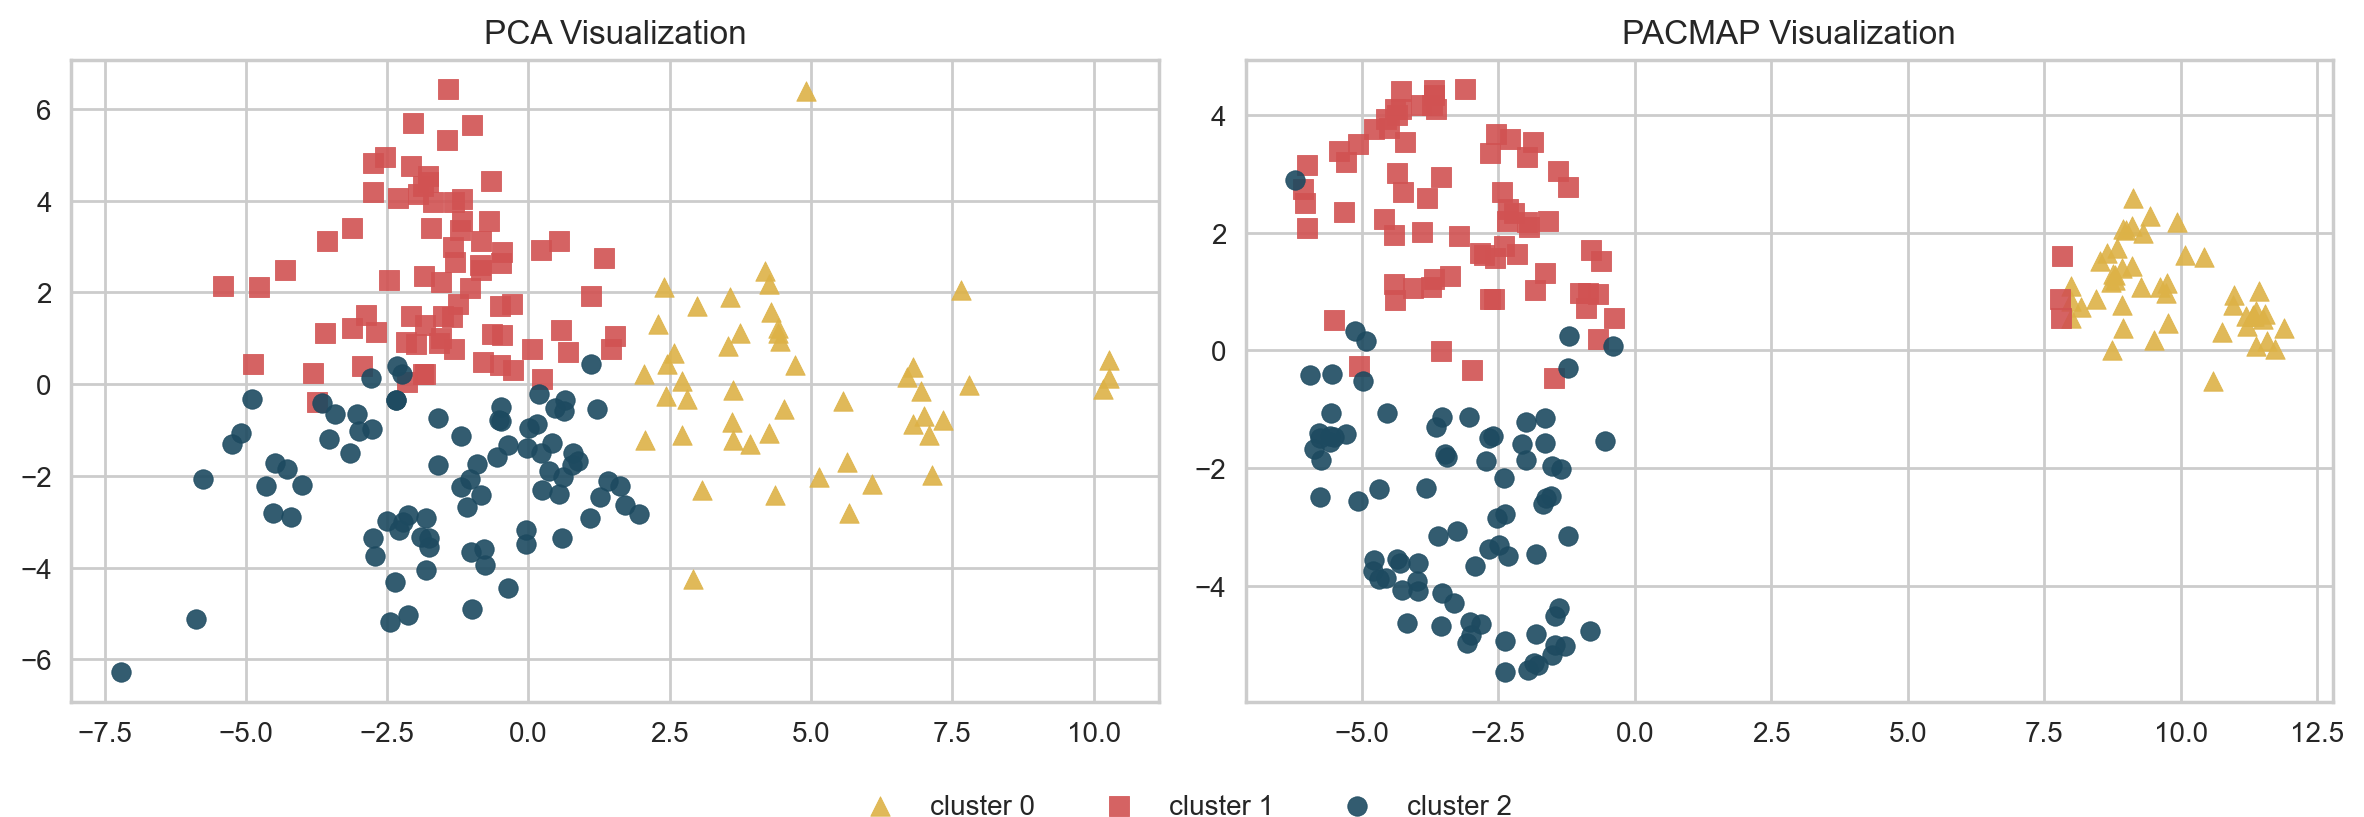

In [17]:
# Visualizing pca and pacmap
from sklearn.decomposition import PCA
import pacmap

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4), dpi=200)

# PCA
pca_scaled_std = PCA(n_components=3,random_state=42)
X_std_pca = pca_scaled_std.fit_transform(X_std)

for l, c, m in zip(range(0, 5), cluster_colors[0:km_fit.n_clusters], ('^', 's', 'o','p','*')):
    ax1.scatter(X_std_pca[y == l, 0],
                X_std_pca[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )


    
    
# PACMAP
embedding = pacmap.PaCMAP(random_state=42)
X_std_pacmap = embedding.fit_transform(X_std.to_numpy())

for l, c, m in zip(range(0, 5), cluster_colors[0:km_fit.n_clusters], ('^', 's', 'o','p','*')):
    ax2.scatter(X_std_pacmap[y == l, 0],
                X_std_pacmap[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )
    
ax1.set_title("PCA Visualization")
ax2.set_title("PACMAP Visualization")

labels = np.unique(km_fit.labels_)
labels = ["cluster "+str(l) for l in labels]
fig.legend(labels, loc='lower center',ncol=len(labels), bbox_transform=(1,0),borderaxespad=-0.5)
plt.tight_layout()
plt.show()

Il procedimento rimane sempre lo stesso anche per il proseguo.

- 3 tecniche per suggerire suddivisione
- suddivisione con kmeans
- cardinality e magnitude per osservare suddivisione
- visualizzazione mediante PCA + kmeans

In [18]:
df.columns

Index(['Player', 'Team', 'FG%', '3P%', 'FT%', 'TS%', 'eFG%', 'ORB%', 'DRB%',
       'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg', 'DRtg',
       'eDiff', 'PTS_p40', 'FGM_p40', 'FGA_p40', '3PM_p40', '3PA_p40',
       'FTM_p40', 'FTA_p40', 'ORB_p40', 'DRB_p40', 'REB_p40', 'AST_p40',
       'STL_p40', 'BLK_p40', 'TOV_p40', 'PF_p40', 'AST/TO', 'cluster'],
      dtype='object')

***
***

# Creazione dataset finale Clustering con l'assegnazione di partenza dei cluster emersi. A partire da questi si condurranno altre analisi cluster aventi come scopo l'identificazione dello stile di gioco

In [19]:
Info = ['Player','Team']

In [20]:
df_info = df[Info]

In [21]:
type(df_info)

pandas.core.frame.DataFrame

In [22]:
X_std.head(2)

,FG%,3P%,FT%,TS%,eFG%,ORB%,DRB%,AST%,TOV%,STL%,...,ORB_p40,DRB_p40,REB_p40,AST_p40,STL_p40,BLK_p40,TOV_p40,PF_p40,AST/TO,cluster
0,-0.589415,0.235142,-0.120928,-0.628269,-0.582978,-0.308665,0.363017,-0.054523,0.363668,-0.439454,...,-0.286561,0.523368,0.173640,0.069137,-0.415447,-0.784926,0.114621,-0.134564,-0.031573,2
1,0.701159,1.083652,1.004033,0.966108,0.936283,0.649505,0.865268,-0.883456,-0.611782,0.114379,...,0.575939,1.038888,0.916432,-0.822181,0.170813,-0.408176,-1.369543,-0.278294,0.069784,2


In [23]:
df_Clustering = pd.concat([df_info,X_std], axis=1)
df_Clustering.head()

,Player,Team,FG%,3P%,FT%,TS%,eFG%,ORB%,DRB%,AST%,...,ORB_p40,DRB_p40,REB_p40,AST_p40,STL_p40,BLK_p40,TOV_p40,PF_p40,AST/TO,cluster
0,Alberto Abalde,RMB,-0.589415,0.235142,-0.120928,-0.628269,-0.582978,-0.308665,0.363017,-0.054523,...,-0.286561,0.523368,0.173640,0.069137,-0.415447,-0.784926,0.114621,-0.134564,-0.031573,2
1,James Anderson,EFE,0.701159,1.083652,1.004033,0.966108,0.936283,0.649505,0.865268,-0.883456,...,0.575939,1.038888,0.916432,-0.822181,0.170813,-0.408176,-1.369543,-0.278294,0.069784,2
2,Danilo Andjusic,ASM,-0.446018,0.716923,0.749325,0.498790,-0.085289,-0.846175,-0.989197,-0.575263,...,-0.818672,-0.994494,-1.010797,-0.490372,-1.186736,-0.646487,0.722098,0.149163,-0.984329,1
3,Kostas Antetokounmpo,LYV,2.554292,0.537154,-1.550124,1.735807,2.245991,0.813095,0.768681,-1.021611,...,0.764936,0.779694,0.853953,-1.071423,0.774345,2.978558,0.197863,2.015487,-1.482427,0
4,Dwayne Bacon,ASM,-0.170254,0.673779,0.254059,-0.229675,-0.281745,-0.682585,-0.042647,-0.649654,...,-0.692338,-0.053507,-0.378176,-0.651207,0.656544,-0.784926,-0.454556,-0.095505,-0.621829,1


In [24]:
df_Clustering.to_csv('data/df_clustering_analysis.csv')